In [28]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

In [29]:
data = pd.read_csv('../data/model-cleaned-players22.csv')

In [30]:
data['value_eur'] = np.log(data['value_eur'])

y = data['value_eur']
x = data.drop(columns= 'value_eur')

x

,position,overall,potential,wage_eur,age,height_cm,weight_kg,club_contract_valid_until,preferred_foot,weak_foot,...,nationality_name_Uganda,nationality_name_Ukraine,nationality_name_United Arab Emirates,nationality_name_United States,nationality_name_Uruguay,nationality_name_Uzbekistan,nationality_name_Venezuela,nationality_name_Wales,nationality_name_Zambia,nationality_name_Zimbabwe
0,1,93,93,320000.0,34,170,72,2023.0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,1,92,92,270000.0,32,185,81,2023.0,1,4,...,0,0,0,0,0,0,0,0,0,0
2,1,91,91,270000.0,36,187,83,2023.0,1,4,...,0,0,0,0,0,0,0,0,0,0
3,1,91,91,270000.0,29,175,68,2025.0,1,5,...,0,0,0,0,0,0,0,0,0,0
4,2,91,91,350000.0,30,181,70,2025.0,1,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17036,2,47,52,1000.0,22,180,64,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0
17037,2,47,59,500.0,19,175,70,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0
17038,2,47,55,500.0,21,178,72,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0
17039,1,47,60,500.0,19,173,66,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=0
)

x_train

,position,overall,potential,wage_eur,age,height_cm,weight_kg,club_contract_valid_until,preferred_foot,weak_foot,...,nationality_name_Uganda,nationality_name_Ukraine,nationality_name_United Arab Emirates,nationality_name_United States,nationality_name_Uruguay,nationality_name_Uzbekistan,nationality_name_Venezuela,nationality_name_Wales,nationality_name_Zambia,nationality_name_Zimbabwe
5118,0,69,72,5000.0,25,188,78,2023.0,1,3,...,0,0,0,0,0,0,0,0,0,0
13220,1,61,70,800.0,21,168,61,2022.0,1,3,...,0,0,0,0,0,0,0,0,0,0
10922,0,64,64,500.0,28,184,78,2021.0,1,2,...,0,0,0,0,0,0,0,0,0,0
13891,0,60,69,550.0,20,175,70,2022.0,0,2,...,0,0,0,0,0,0,0,0,0,0
13678,1,60,60,900.0,30,187,85,2023.0,1,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1,65,68,9000.0,25,188,80,2022.0,1,3,...,0,0,0,0,0,0,0,0,0,0
13123,0,61,69,2000.0,22,180,75,2022.0,1,3,...,0,0,0,0,0,0,0,0,0,0
9845,1,65,80,2000.0,21,174,61,2022.0,1,2,...,0,0,0,0,0,0,0,0,0,0
10799,1,64,72,500.0,23,180,73,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [32]:
svr = SVR().fit(x_train, y_train)

In [33]:
y_train_pred = svr.predict(x_train)

In [34]:
train_r2s = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_evs = explained_variance_score(y_train, y_train_pred)

print(train_r2s, train_mae, train_mse, train_rmse, train_evs)

0.6369077013830784 0.5516994278787499 0.5213257238692597 0.7220288940681389 0.6369375780447302


In [35]:
y_test_pred = svr.predict(x_test)

In [36]:
test_r2s = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_evs = explained_variance_score(y_test, y_test_pred)

print(test_r2s, test_mae, test_mse, test_rmse, test_evs)

0.6479368473968765 0.5513778543674529 0.5053254338426679 0.7108624577530227 0.648047991448994


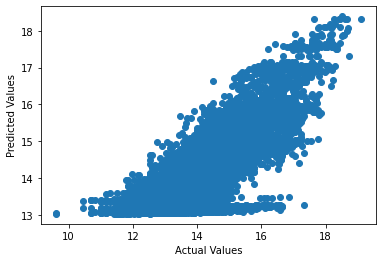

In [37]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

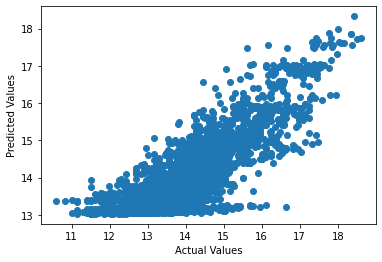

In [38]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [39]:
cross_val_score_train = cross_val_score(svr, x_train, y_train, scoring='r2', cv=10)
print(np.mean(cross_val_score_train))

0.6349359774944467


In [40]:
cross_val_score_test = cross_val_score(svr, x_test, y_test, scoring='r2', cv=10)
print(np.mean(cross_val_score_test))

0.6338235130504282


In [41]:
mse_scores = -cross_val_score(svr, x_test, y_test, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(mse_scores)
mean_rmse = np.mean(rmse_scores)

print('RMSE: ', mean_rmse)

RMSE:  0.7197309861309581


In [46]:
# I had to remove the '1.0' from each hyperparameter and reduce the x_train and y_train to just 100 rows
# because it still didn't finish running after several hours.
# And even with this reduction, it still took over 45 minutes to complete.
params = {
   'C': [0.001, 0.01, 0.1],
   'gamma': [0.001, 0.01, 0.1],
   'epsilon': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(
   SVR(kernel='linear'),
   params,
   cv=5,
   n_jobs=-1, # This uses all available CPU cores which improves performance
   error_score='raise', # If there's any error, this raises the exact error instead of a more vague error. 
   scoring='neg_mean_squared_error'
)
grid_search.fit(x_train[:100], y_train[:100])

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

train_score = best_model.score(x_train, y_train)
test_score = best_model.score(x_test, y_test)

print('train: ' + str(train_score))
print('test: ' + str(test_score))
print('mse: ' + str(mse))
print('rmse: ' + str(rmse))

train: 0.9080684075684187
test: 0.9081179864742812
mse: 0.13188065267245408
rmse: 0.36315375899535185


In [47]:
best_params

{'C': 0.001, 'epsilon': 0.1, 'gamma': 0.001}